# Нейронные сети. Реализация в SKLearn.

In [78]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [90]:
X, y = datasets.load_wine(return_X_y=True)

In [91]:
X.shape

(178, 13)

In [92]:
X = StandardScaler().fit_transform(X)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [94]:
mlp = MLPClassifier(hidden_layer_sizes=(5,4),max_iter=500, verbose = True)

In [95]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.21685202
Iteration 2, loss = 1.21393400
Iteration 3, loss = 1.21121829
Iteration 4, loss = 1.20865809
Iteration 5, loss = 1.20612385
Iteration 6, loss = 1.20361074
Iteration 7, loss = 1.20110484
Iteration 8, loss = 1.19859973
Iteration 9, loss = 1.19611903
Iteration 10, loss = 1.19366322
Iteration 11, loss = 1.19123016
Iteration 12, loss = 1.18887747
Iteration 13, loss = 1.18655062
Iteration 14, loss = 1.18424188
Iteration 15, loss = 1.18193875
Iteration 16, loss = 1.17966163
Iteration 17, loss = 1.17746265
Iteration 18, loss = 1.17528020
Iteration 19, loss = 1.17311648
Iteration 20, loss = 1.17097433
Iteration 21, loss = 1.16890547
Iteration 22, loss = 1.16695974
Iteration 23, loss = 1.16503600
Iteration 24, loss = 1.16313626
Iteration 25, loss = 1.16129541
Iteration 26, loss = 1.15950556
Iteration 27, loss = 1.15773798
Iteration 28, loss = 1.15599813
Iteration 29, loss = 1.15426411
Iteration 30, loss = 1.15256047
Iteration 31, loss = 1.15088207
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

Итоговое значение функции потерь:

In [96]:
mlp.loss_

0.053516208217969506

Веса обученной сети:

In [49]:
mlp.coefs_

[array([[ 0.30574609, -0.19714709,  0.50610916, -0.05626513, -0.40668055],
        [ 0.4912466 , -0.28107091, -0.69433642,  0.04078381, -0.79083917],
        [ 0.05495846,  0.2681093 ,  0.22608961,  0.23754038, -0.4105116 ],
        [-0.15943474, -0.7868783 , -0.13716481,  0.03293111,  0.56226087],
        [ 0.54313145,  0.30666369, -0.33652811,  0.02367729, -0.01486996],
        [ 0.2289214 ,  0.68112379, -0.22668036, -0.2149467 , -0.11277103],
        [-0.67958365,  0.19871664,  0.25308983, -0.69265737,  0.26620023],
        [ 0.46695792, -0.41321798,  0.76343207,  0.38976038, -0.13175751],
        [-0.53364807,  0.56452088, -0.16693785, -0.29240707,  0.45208656],
        [ 0.85215914, -0.09305955, -0.25789191, -0.19955093, -0.24876572],
        [-0.43671167,  0.10385784,  0.69823464, -0.66664573,  0.00726848],
        [ 0.25663985, -0.03488315, -0.15412977, -0.45736562, -0.00727292],
        [ 0.34411874,  0.74243244,  0.45802669,  0.03354295, -0.82216451]]),
 array([[-0.33268078, -

Применение полученного нейросетевого классификатора:

In [70]:
y_pred = mlp.predict(X_test)

In [77]:
y_pred

array([0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1,
       2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0,
       2])

In [71]:
confusion_matrix(y_pred, y_test)

array([[17,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 14]])

### Выбор количества итераций обучения

In [51]:
train_scores = []
test_scores = []
number_of_iterations = np.arange(10,300,20)
for iters in number_of_iterations:
    clf = MLPClassifier(hidden_layer_sizes=(15,10), max_iter=iters, tol=0.001, random_state=1)
    cv_results = cross_validate(clf, X, y, cv=4, verbose=0, return_train_score=True)
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

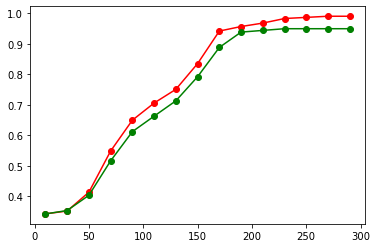

In [52]:
plt.plot(number_of_iterations, train_scores, 'o-', color="r")
plt.plot(number_of_iterations, test_scores, 'o-', color="g")
plt.show()

Наблюдается небольшое переобучение. Оптимальное значение количества итераций - около 200.

### Выбор параметра L2-регуляризации

In [53]:
np_means = []
alphas = np.linspace(0,10,40)
for alpha in alphas:
    clf = MLPClassifier(hidden_layer_sizes=(15,10), max_iter=250, tol=0.001, alpha = alpha, random_state=1)
    cv_results = cross_validate(clf, X, y, cv=4, verbose=0)
    np_means.append(np.mean(cv_results['test_score']))

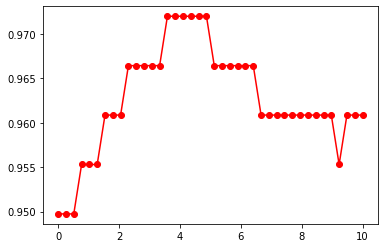

In [54]:
plt.plot(alphas, np_means, 'o-', color="r")
plt.show()

Оптимальное значение alpha - около 4.

### Выбор величины пакета

In [76]:
np_means = []
loss_curves = []
batch_sizes = [10,30,60,100]
for batch_size in batch_sizes:
    clf = MLPClassifier(hidden_layer_sizes=(15,10), 
                        max_iter=250, 
                        tol=0.001, 
                        alpha = 4, 
                        batch_size = batch_size,
                        random_state=1)
    clf.fit(X_train, y_train)
    loss_curves.append(clf.loss_curve_)
    y_pred = clf.predict(X_test)
    print('Batch size:', batch_size)
    print('Confusion matrix:')
    print(confusion_matrix(y_pred, y_test), end = '\n\n')
    

Batch size: 10
Confusion matrix:
[[ 0  0  0]
 [17 13 15]
 [ 0  0  0]]

Batch size: 30
Confusion matrix:
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]

Batch size: 60
Confusion matrix:
[[17  0  0]
 [ 0 13  0]
 [ 0  0 15]]

Batch size: 100
Confusion matrix:
[[17  0  0]
 [ 0 13  0]
 [ 0  0 15]]



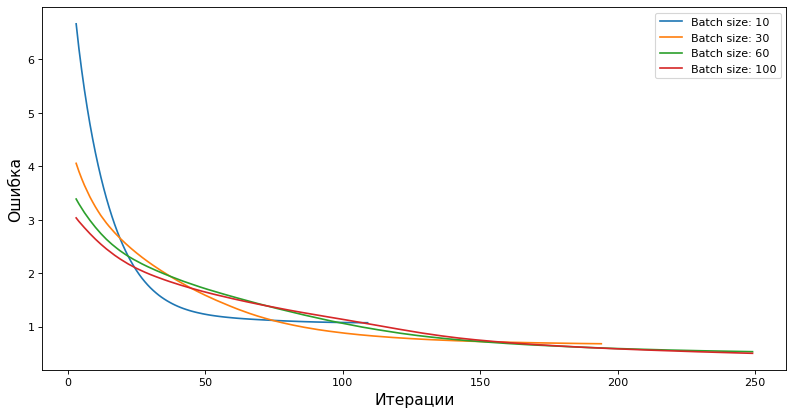

In [61]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(np.arange(3, len(loss_curves[0])), loss_curves[0][3:], label='Batch size: 10')
plt.plot(np.arange(3, len(loss_curves[1])), loss_curves[1][3:], label='Batch size: 30')
plt.plot(np.arange(3, len(loss_curves[2])), loss_curves[2][3:], label='Batch size: 60')
plt.plot(np.arange(3, len(loss_curves[3])), loss_curves[3][3:], label='Batch size: 100')
plt.xlabel('Итерации', size=14)
plt.ylabel('Ошибка', size=14)
plt.legend(loc='upper right')
plt.show();

Для выбранного набора данных малые пакеты обеспечивают быструю сходимость, однако большие пакеты в итоге лучше оптимизируют функцию потерь. Пакет в 10 элементов даже не обеспечил правильной работы классификатора.